In [ ]:
#Connect to G Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Show present working directory
!pwd

/content


In [ ]:
#Set working directory
%cd /content/drive/MyDrive/super_resolution/img_align_celeba/

/content/drive/MyDrive/super_resolution/img_align_celeba


In [ ]:
#!unzip img_align_celeba_small.zip

In [ ]:
#Set working directory
%cd /content/drive/MyDrive/super_resolution/

/content/drive/MyDrive/super_resolution


In [ ]:
!ls

000001.jpg  000299.jpg	000514.jpg  000726.jpg	000938.jpg
000002.jpg  000300.jpg	000515.jpg  000727.jpg	000939.jpg
000003.jpg  000301.jpg	000516.jpg  000728.jpg	000940.jpg
000004.jpg  000302.jpg	000517.jpg  000729.jpg	000941.jpg
000005.jpg  000303.jpg	000518.jpg  000730.jpg	000942.jpg
000006.jpg  000304.jpg	000519.jpg  000731.jpg	000943.jpg
000007.jpg  000306.jpg	000520.jpg  000732.jpg	000944.jpg
000008.jpg  000307.jpg	000521.jpg  000733.jpg	000945.jpg
000009.jpg  000308.jpg	000522.jpg  000734.jpg	000946.jpg
000010.jpg  000309.jpg	000523.jpg  000735.jpg	000947.jpg
000011.jpg  000310.jpg	000524.jpg  000736.jpg	000948.jpg
000012.jpg  000311.jpg	000525.jpg  000737.jpg	000949.jpg
000013.jpg  000312.jpg	000526.jpg  000738.jpg	000950.jpg
000014.jpg  000313.jpg	000527.jpg  000739.jpg	000951.jpg
000015.jpg  000314.jpg	000528.jpg  000740.jpg	000952.jpg
000016.jpg  000315.jpg	000529.jpg  000741.jpg	000953.jpg
000017.jpg  000316.jpg	000530.jpg  000742.jpg	000954.jpg
000018.jpg  000317.jpg	000531.j

In [ ]:
import os, cv2, glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import pyramid_reduce 
plt.style.use('dark_background')

In [ ]:
base_path = '/content/drive/MyDrive/super_resolution/'
img_base_path = os.path.join(base_path, 'img_align_celeba')
#target_img_path = os.path.join(base_path, 'processed') # 데이터 차원이 이상하게 나왔음 ㅜㅜㅜ (44,44,1)
target_img_path = os.path.join(base_path, 'processed')

In [ ]:
# eval list small 로 바꿈 
eval_list = np.loadtxt(os.path.join(base_path, 'list_eval_partition_small.csv'), dtype=str, delimiter=',', skiprows=1)
eval_list[:10]

array([['000001.jpg', '0'],
       ['000002.jpg', '0'],
       ['000003.jpg', '0'],
       ['000004.jpg', '0'],
       ['000005.jpg', '0'],
       ['000006.jpg', '0'],
       ['000007.jpg', '0'],
       ['000008.jpg', '0'],
       ['000009.jpg', '0'],
       ['000010.jpg', '0']], dtype='<U10')

In [ ]:
len(eval_list)

10000

(178, 178, 3) (177, 177, 3)


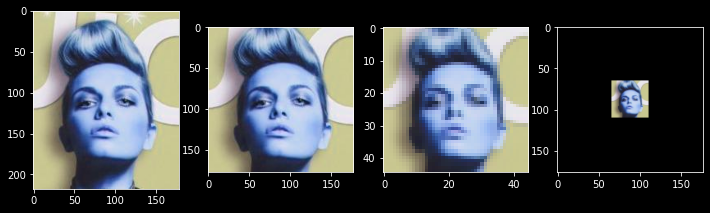

In [ ]:
img_sample = cv2.imread(os.path.join(img_base_path, eval_list[4][0])) #5th picture check :) 

h, w, _ = img_sample.shape

crop_sample = img_sample[int((h-w)/2):int(-(h-w)/2), :]
# multichannel=True 넣어야 3차원으로 (즉 color)
resized_sample = pyramid_reduce(crop_sample, downscale=4, multichannel=True)

pad = int((crop_sample.shape[0] - resized_sample.shape[0]) / 2)

padded_sample = cv2.copyMakeBorder(resized_sample, top=pad, bottom=pad, left=pad, right=pad, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))

print(crop_sample.shape, padded_sample.shape)

plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.imshow(img_sample)
plt.subplot(1, 4, 2)
plt.imshow(crop_sample)
plt.subplot(1, 4, 3)
plt.imshow(resized_sample)
plt.subplot(1, 4, 4)
plt.imshow(padded_sample)

In [ ]:
# 원인 찾음 데이터가 다 안들어 가서 에러가 뜬거 ㅠㅠ 
#  h, w, _ = img.shape

In [ ]:
#Show present working directory
!pwd

/content/drive/My Drive/super_resolution


In [ ]:
#!unzip img_align_celeba.zip 

In [ ]:
# Before I started, I made x_train, y_train, x_val, y_val, x_test, y_test folder.
#downscale = 4
#n_train = 162770
#n_val = 19867
#n_test = 19962

downscale = 4
n_train = 8800
n_val = 200
n_test = 1000

for i, e in enumerate(eval_list):
    print(e)
    filename, ext = os.path.splitext(e[0])
    
    img_path = os.path.join(img_base_path, e[0])
    
    img = cv2.imread(img_path)
    
    h, w, _ = img.shape
    
    crop = img[int((h-w)/2):int(-(h-w)/2), :]
    crop = cv2.resize(crop, dsize=(176, 176))
    # multichannel=True 넣어야 3차원으로 (즉 color)
    resized = pyramid_reduce(crop, downscale=downscale, multichannel=True)

    norm = cv2.normalize(crop.astype(np.float64), None, 0, 1, cv2.NORM_MINMAX)
    
    if int(e[1]) == 0:
        np.save(os.path.join(target_img_path, 'x_train', filename + '.npy'), resized)
        np.save(os.path.join(target_img_path, 'y_train', filename + '.npy'), norm)
    elif int(e[1]) == 1:
        np.save(os.path.join(target_img_path, 'x_val', filename + '.npy'), resized)
        np.save(os.path.join(target_img_path, 'y_val', filename + '.npy'), norm)
    elif int(e[1]) == 2:
        np.save(os.path.join(target_img_path, 'x_test', filename + '.npy'), resized)
        np.save(os.path.join(target_img_path, 'y_test', filename + '.npy'), norm)


Streaming output truncated to the last 5000 lines.
['005001.jpg' '0']
['005002.jpg' '0']
['005003.jpg' '0']
['005004.jpg' '0']
['005005.jpg' '0']
['005006.jpg' '0']
['005007.jpg' '0']
['005008.jpg' '0']
['005009.jpg' '0']
['005010.jpg' '0']
['005011.jpg' '0']
['005012.jpg' '0']
['005013.jpg' '0']
['005014.jpg' '0']
['005015.jpg' '0']
['005016.jpg' '0']
['005017.jpg' '0']
['005018.jpg' '0']
['005019.jpg' '0']
['005020.jpg' '0']
['005021.jpg' '0']
['005022.jpg' '0']
['005023.jpg' '0']
['005024.jpg' '0']
['005025.jpg' '0']
['005026.jpg' '0']
['005027.jpg' '0']
['005028.jpg' '0']
['005029.jpg' '0']
['005030.jpg' '0']
['005031.jpg' '0']
['005032.jpg' '0']
['005033.jpg' '0']
['005034.jpg' '0']
['005035.jpg' '0']
['005036.jpg' '0']
['005037.jpg' '0']
['005038.jpg' '0']
['005039.jpg' '0']
['005040.jpg' '0']
['005041.jpg' '0']
['005042.jpg' '0']
['005043.jpg' '0']
['005044.jpg' '0']
['005045.jpg' '0']
['005046.jpg' '0']
['005047.jpg' '0']
['005048.jpg' '0']
['005049.jpg' '0']
['005050.jpg' '0']